In [93]:
# A/B Тестирование: Новый цвет кнопки на главной странице Яндекса
# Цель: Проверить, увеличивает ли новая кнопка (группа B) конверсию пользователей по сравнению с текущей (группа A)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [95]:
# 1. Генерация данных

# Допустим, у нас есть 10 000 пользователей: 5000 в каждой группе
n_A = 5000  # Группа A — старая кнопка
n_B = 5000  # Группа B — новая кнопка

# Пусть в группе A конверсия = 5% (люди кликнули по кнопке)
p_A = 0.05
# В группе B мы хотим проверить, улучшится ли конверсия. Пусть она чуть выше — 6.5%
p_B = 0.065

# Сгенерируем, кто кликнул: 1 — клик, 0 — нет
clicks_A = np.random.binomial(1, p_A, n_A)
clicks_B = np.random.binomial(1, p_B, n_B)


# Объединим в DataFrame
data = pd.DataFrame({
    'group': ['A'] * n_A + ['B'] * n_B,
    'click': np.concatenate([clicks_A, clicks_B])
})
data.head(12)

,group,click
0,A,0
1,A,0
2,A,0
3,A,0
4,A,0
5,A,1
6,A,1
7,A,0
8,A,0
9,A,0


In [97]:
# 2. Первичный анализ

print("Размеры групп:")
print(data.groupby('group').size())

print("\nКонверсии в группах:")
print(data.groupby('group')['click'].mean())

Размеры групп:
group
A    5000
B    5000
dtype: int64

Конверсии в группах:
group
A    0.0494
B    0.0674
Name: click, dtype: float64


/var/folders/cf/j39pgbzn19v2b0d203153jqh0000gn/T/ipykernel_85626/3191462361.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='group', y='click', data=data, ci=95)


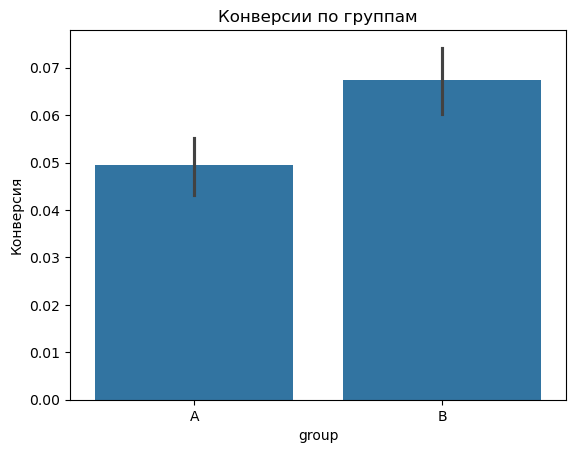

In [99]:
# 3. Визуализация

sns.barplot(x='group', y='click', data=data, ci=95)
plt.title("Конверсии по группам")
plt.ylabel("Конверсия")
plt.show()

In [101]:

# 4. Проверка гипотезы (t-тест)

# H0: Конверсии равны
# H1: Конверсии разные

# Отдельно по группам
clicks_A = data[data['group'] == 'A']['click']
clicks_B = data[data['group'] == 'B']['click']

# T-тест для независимых выборок
stat, p_value = stats.ttest_ind(clicks_B, clicks_A)

print(f"\nT-статистика: {stat:.4f}")
print(f"p-value: {p_value:.4f}")


T-статистика: 3.8404
p-value: 0.0001


In [103]:
# 5. Вывод

alpha = 0.05
if p_value < alpha:
    print("\n✅ Результат статистически значим. Новая кнопка действительно лучше.")
else:
    print("\n❌ Нет статистически значимой разницы. Новая кнопка не лучше текущей.")


✅ Результат статистически значим. Новая кнопка действительно лучше.
